In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, RealData

In [2]:
g = np.transpose(np.genfromtxt('gaia_data_253_csv',delimiter=',',skip_header=1,usecols=(10,11,100,101,102)))

In [3]:
teff_err_up = np.zeros(np.size(g[2]))
for i in range(np.size(g[2])):
    teff_err_up[i] = -(g[2][i] - g[4][i])
    
teff_err_lo = np.zeros(np.size(g[2]))
for i in range(np.size(g[2])):
    teff_err_lo[i] = g[2][i] - g[3][i]

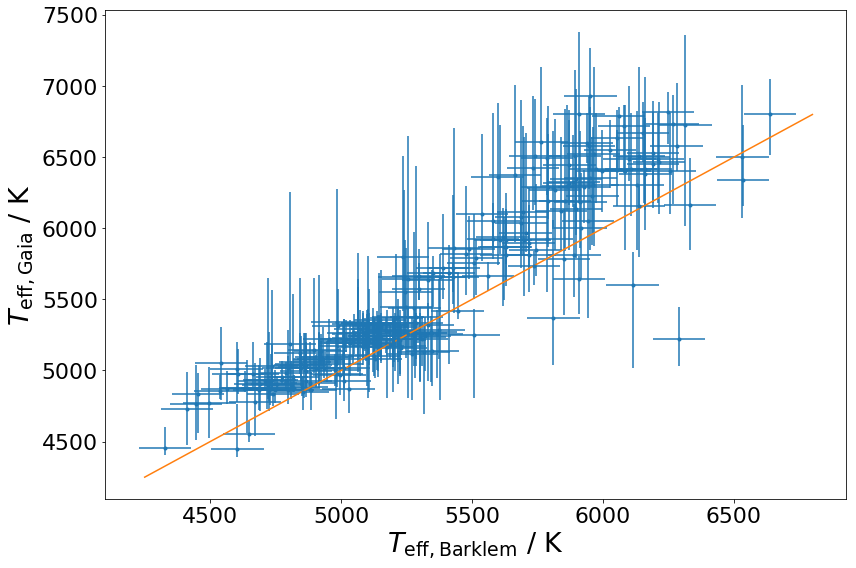

In [4]:
def lin(x,a,b):
    return a*x + b

x = np.linspace(4250,6800)
plt.figure(figsize=(12,8))
plt.errorbar(g[0],g[2],xerr=g[1],yerr=[teff_err_lo,teff_err_up],marker='.',linestyle='None')
plt.plot(x,lin(x,1,0))
plt.xticks(size=22)
plt.yticks(size=22)
plt.xlabel('$T_{\mathrm{eff,Barklem}}$ / K',size=27)
plt.ylabel('$T_{\mathrm{eff,Gaia}}$ / K',size=27)
plt.tight_layout()
#plt.title('Eff. Temp. from Gaia DR2 against eff. Temp. from Hamburg/ESO survey',size=20)
plt.savefig('Abbildungen/T_eff_vs_T_eff_errorbars.png')

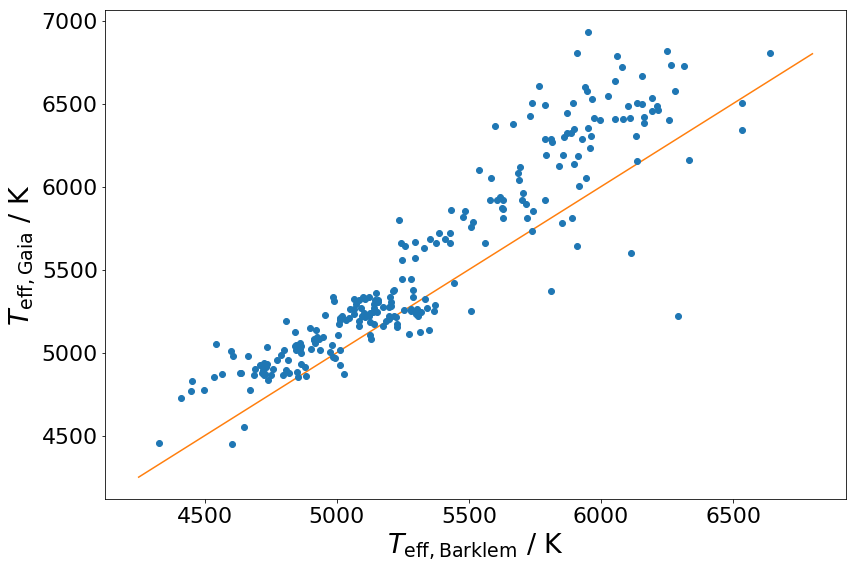

In [5]:
x = np.linspace(4250,6800)
plt.figure(figsize=(12,8))
plt.errorbar(g[0],g[2],marker='o',linestyle='None')
plt.plot(x,lin(x,1,0))
plt.xticks(size=22)
plt.yticks(size=22)
plt.xlabel('$T_{\mathrm{eff,Barklem}}$ / K',size=27)
plt.ylabel('$T_{\mathrm{eff,Gaia}}$ / K',size=27)
plt.tight_layout()
#plt.title('Eff. Temp. from Gaia DR2 against eff. Temp. from Hamburg/ESO survey w/o error bars',size=20)
plt.savefig('Abbildungen/T_eff_vs_T_eff.png')

The object at below -1000 is the star HE0344+0139 in the Barklem catalogue, 3270083340628669312 in Gaia DR2 after crossmatch.


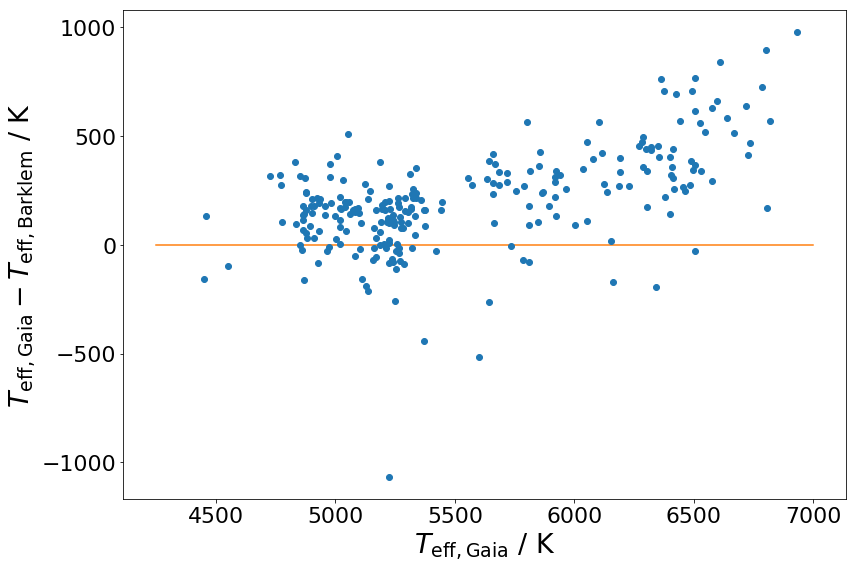

In [6]:
x = np.linspace(4250,7000)
def zero(x):
    return 0*x
plt.figure(figsize=(12,8))
plt.errorbar(g[2],g[2]-g[0],marker='o',linestyle='None')
plt.plot(x,zero(x))
plt.xticks(size=22)
plt.yticks(size=22)
plt.xlabel('$T_{\mathrm{eff,Gaia}}$ / K',size=27)
plt.ylabel('$T_{\mathrm{eff,Gaia}} - T_{\mathrm{eff,Barklem}}$ / K',size=27)
#plt.title('Residual plot of temperatures',size=20)
plt.tight_layout()
plt.savefig('Abbildungen/T_eff_residual_plot.png')

print('The object at below -1000 is the star HE0344+0139 in the Barklem catalogue, 3270083340628669312 in Gaia DR2 after crossmatch.')

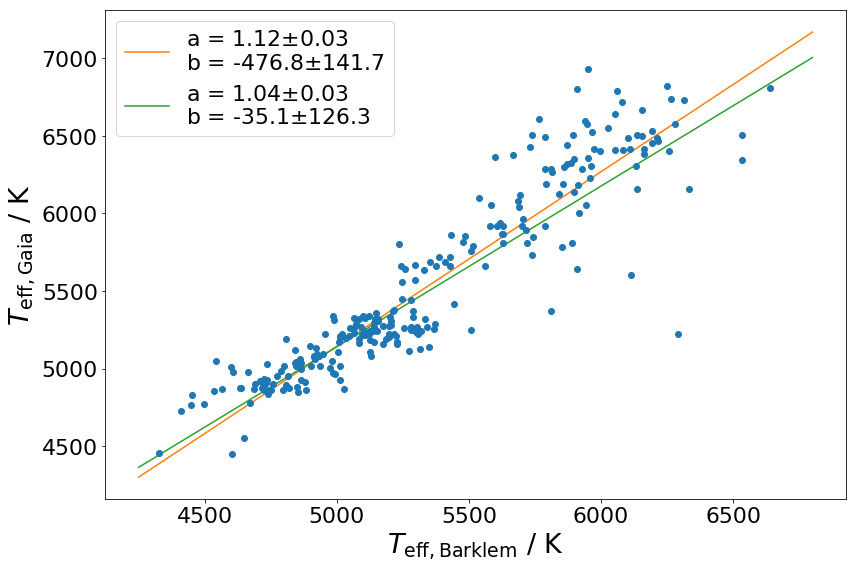

In [7]:
popt1,pcov1=curve_fit(lin,g[0],g[2],sigma=teff_err_up)
popt2,pcov2=curve_fit(lin,g[0],g[2],sigma=teff_err_lo)

#s1 = np.zeros(np.size(g[0]))
#t1 = np.zeros(np.size(g[0]))
#for i in range(np.size(g[0])):
#    s1[i] = np.abs(lin(g[0][i],popt[0],popt[1])-g[2][i])
#    t1[i] = (s1[i]/np.sqrt(2))**2                     # Faktor 1/sqrt(2) ist sin(45°)
#    
#lms1 = np.sqrt(np.sum(t1)/(np.size(g[0]-1)))
#
#shade1 = lms1*np.sqrt(2)

x = np.linspace(4250,6800)
plt.figure(figsize=(12,8))
plt.errorbar(g[0],g[2],marker='o',linestyle='None')
plt.plot(x,lin(x,popt1[0],popt1[1]),label='a = '+str(round((popt1[0]),2))+'$\pm$'+str(round((np.sqrt(pcov1[0][0])),2))+'\nb = '+str(round((popt1[1]),1))+'$\pm$'+str(round((np.sqrt(pcov1[1][1])),1)))
plt.plot(x,lin(x,popt2[0],popt2[1]),label='a = '+str(round((popt2[0]),2))+'$\pm$'+str(round((np.sqrt(pcov2[0][0])),2))+'\nb = '+str(round((popt2[1]),1))+'$\pm$'+str(round((np.sqrt(pcov2[1][1])),1)))
#plt.fill_between(x,lin(x,popt[0],popt[1])-shade1,lin(x,popt[0],popt[1])+shade1,alpha=0.2)
#plt.text(4285,7100,'std=162.1',size=16)
plt.xticks(size=22)
plt.yticks(size=22)
plt.xlabel('$T_{\mathrm{eff,Barklem}}$ / K',size=27)
plt.ylabel('$T_{\mathrm{eff,Gaia}}$ / K',size=27)
#plt.title('Eff. Temp. from Gaia DR2 against eff. Temp. from Hamburg/ESO survey with linear fit, parameters a+b',size=20)
plt.legend(fontsize=22,loc=2)
plt.tight_layout()
plt.savefig('Abbildungen/T_eff_vs_T_eff_fit2.png')

#c1 = np.array([])
#for i in range(np.size(g[0])):
#    if lin(g[0][i],popt[0],popt[1])-shade1 > g[2][i] or lin(g[0][i],popt[0],popt[1])+shade1 < g[2][i]:
#        c1 = np.append(c1,i)
#        
#c1 = c1.astype(int)
#
#print('Within the shaded area: '+str(round((np.size(g[0])-np.size(c1))/np.size(g[0])*100,2))+'% of all stars')

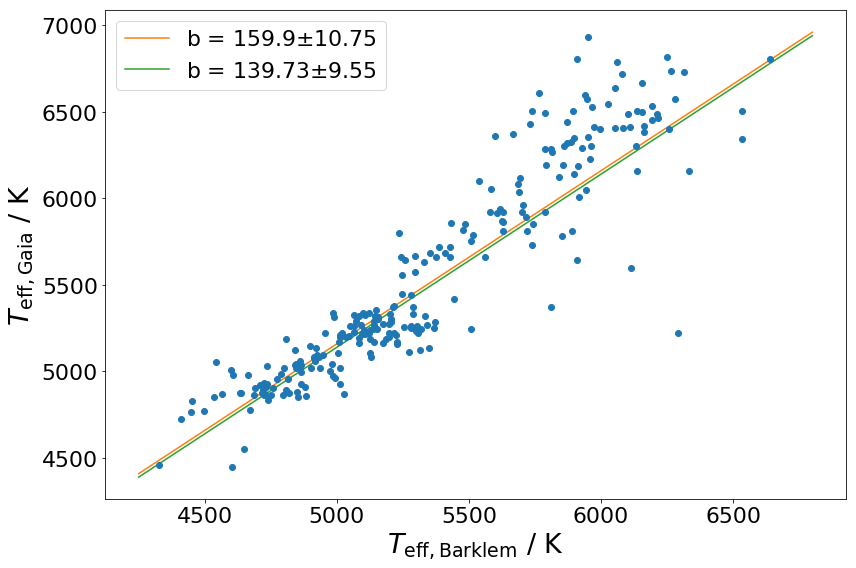

In [8]:
def lin1(x,b):
    return x + b

popt3,pcov3 = curve_fit(lin1,g[0],g[2],sigma=teff_err_up)
popt4,pcov4 = curve_fit(lin1,g[0],g[2],sigma=teff_err_lo)

#s2 = np.zeros(np.size(g[0]))
#t2 = np.zeros(np.size(g[0]))
#for i in range(np.size(g[0])):
#    s2[i] = np.abs(lin1(g[0][i],popt1[0])-g[2][i])
#    t2[i] = (s2[i]/np.sqrt(2))**2                     # Faktor 1/sqrt(2) ist sin(45°)
#    
#lms2 = np.sqrt(np.sum(t2)/(np.size(g[0]-1)))
#
#shade2 = lms2*np.sqrt(2)

x = np.linspace(4250,6800)
plt.figure(figsize=(12,8))
plt.errorbar(g[0],g[2],marker='o',linestyle='None')
plt.plot(x,lin1(x,popt3[0]),label='b = '+str(round((popt3[0]),2))+'$\pm$'+str(round((np.sqrt(pcov3[0][0])),2)))
plt.plot(x,lin1(x,popt4[0]),label='b = '+str(round((popt4[0]),2))+'$\pm$'+str(round((np.sqrt(pcov4[0][0])),2)))
#plt.fill_between(x,lin1(x,popt1[0])-shade2,lin1(x,popt1[0])+shade2,alpha=0.2)
#plt.text(4285,7100,'std=165.4',size=16)
plt.xticks(size=22)
plt.yticks(size=22)
plt.xlabel('$T_{\mathrm{eff,Barklem}}$ / K',size=27)
plt.ylabel('$T_{\mathrm{eff,Gaia}}$ / K',size=27)
#plt.title('Eff. Temp. from Gaia DR2 against eff. Temp. from Hamburg/ESO survey with linear fit, parameter only b',size=20)
plt.legend(fontsize=22,loc=2)
plt.tight_layout()
plt.savefig('Abbildungen/T_eff_vs_T_eff_fit1.png')

#c2 = np.array([])
#for i in range(np.size(g[0])):
#    if lin1(g[0][i],popt1[0])-shade2 > g[2][i] or lin1(g[0][i],popt1[0])+shade2 < g[2][i]:
#        c2 = np.append(c2,i)
#        
#c2 = c2.astype(int)
#
#print('Within the shaded area: '+str(round((np.size(g[0])-np.size(c2))/np.size(g[0])*100,2))+'% of all stars')

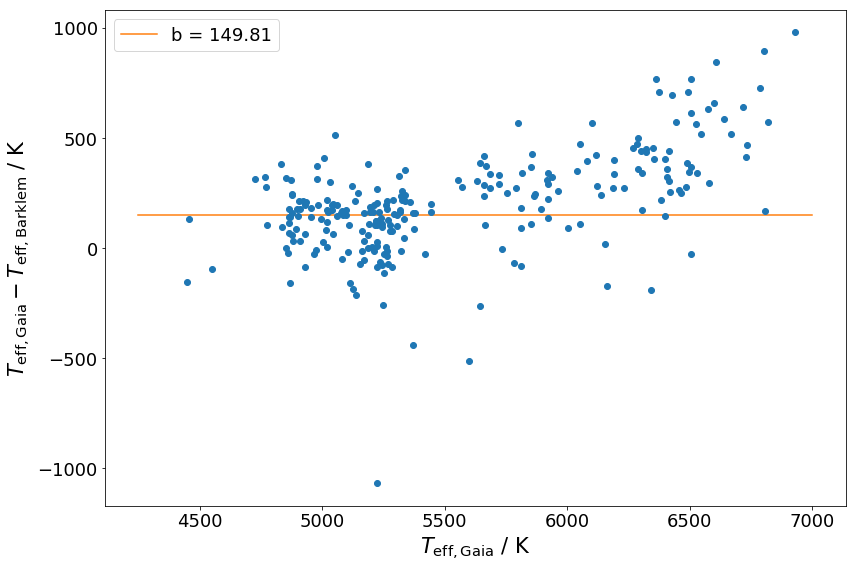

In [9]:
offset = (popt3[0]+popt4[0])/2

x = np.linspace(4250,7000)
def zero1(x):
    return 0*x+offset
plt.figure(figsize=(12,8))
plt.errorbar(g[2],g[2]-g[0],marker='o',linestyle='None')
plt.plot(x,zero1(x),label='b = '+str(round(offset,2)))
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('$T_{\mathrm{eff,Gaia}}$ / K',size=21)
plt.ylabel('$T_{\mathrm{eff,Gaia}} - T_{\mathrm{eff,Barklem}}$ / K',size=21)
#plt.title('Residual plot of temperatures, offset b = '+str(round(offset,2)),size=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig('Abbildungen/T_eff_residual_plot_fit.png')

In [10]:
h = np.transpose(np.genfromtxt('gaia_data_benchmark_teff_csv',delimiter=',',skip_header=1))

q=np.array([5787,4636,5140])
w=np.array([48,37,49])
e=np.array([5829.7,4710.7,5264.7])
r=np.array([282.2,123.7,58.2])
t=np.array([290.7,94.8,102.6])
iv=np.array([q,w,e,r,t])

teff_err_up1 = np.zeros(np.size(h[2]))
for i in range(np.size(h[2])):
    teff_err_up1[i] = -(h[2][i] - h[4][i])
    
teff_err_lo1 = np.zeros(np.size(h[2]))
for i in range(np.size(h[2])):
    teff_err_lo1[i] = h[2][i] - h[3][i]

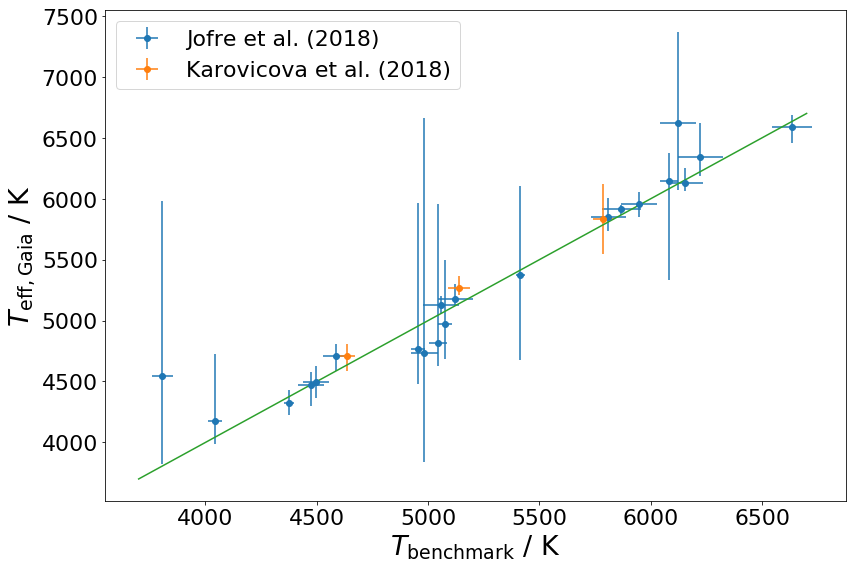

In [11]:
def lin(x,a,b):
    return a*x + b

x = np.linspace(3700,6700)
plt.figure(figsize=(12,8))
plt.errorbar(h[0],h[2],xerr=h[1],yerr=[teff_err_lo1,teff_err_up1],marker='o',linestyle='None',label='Jofre et al. (2018)')
plt.errorbar(iv[0],iv[2],xerr=iv[1],yerr=[iv[3],iv[4]],marker='o',linestyle='None',label='Karovicova et al. (2018)')
plt.plot(x,lin(x,1,0))
plt.xticks(size=22)
plt.yticks(size=22)
plt.xlabel('$T_{\mathrm{benchmark}}$ / K',size=27)
plt.ylabel('$T_{\mathrm{eff,Gaia}}$ / K',size=27)
#plt.title('Eff. Temp. of Gaia DR2 against eff. Temp. of benchmark stars from Jofre et al.',size=20)
plt.legend(fontsize=22,loc=2)
plt.tight_layout()
plt.savefig('Abbildungen/T_eff_benchmark.png')

In [12]:
a = np.zeros(35)
for i in range(np.size(h[0])):
    if np.isnan(h[0][i]) == True or np.isnan(h[2][i]) == True:
        pass
    else:
        a[i] = (lin(h[0][i],1,0)-h[2][i])**2

d = np.sqrt(np.sum(a)/(20*19))
print('"Standard deviation" = ',d)

"Standard deviation" =  51.92364507485056


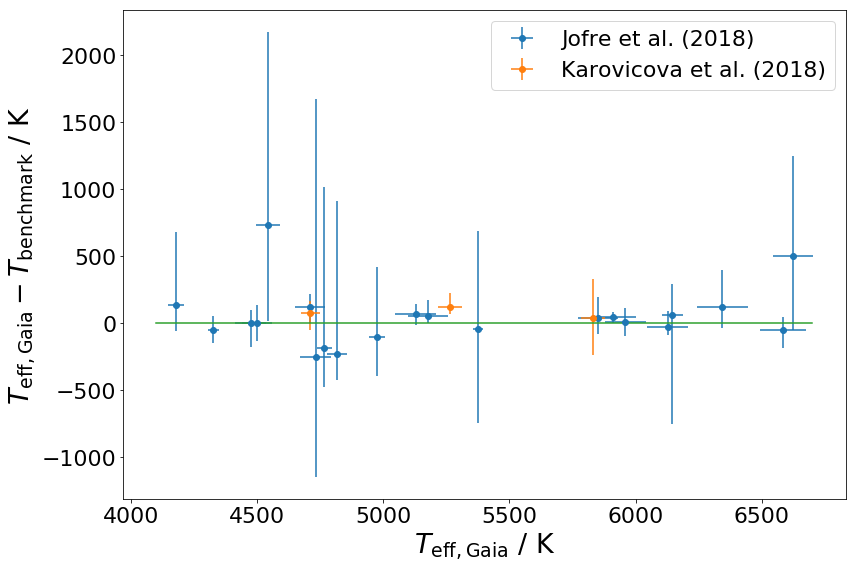

In [13]:
x = np.linspace(4100,6700)
plt.figure(figsize=(12,8))
plt.errorbar(h[2],h[2]-h[0],xerr=h[1],yerr=[teff_err_lo1,teff_err_up1],marker='o',linestyle='None',label='Jofre et al. (2018)')
plt.errorbar(iv[2],iv[2]-iv[0],xerr=iv[1],yerr=[iv[3],iv[4]],marker='o',linestyle='None',label='Karovicova et al. (2018)')
plt.plot(x,zero(x))
plt.xticks(size=22)
plt.yticks(size=22)
plt.xlabel('$T_{\mathrm{eff,Gaia}}$ / K',size=27)
plt.ylabel('$T_{\mathrm{eff,Gaia}} - T_{\mathrm{benchmark}}$ / K',size=27)
#plt.title('Residual plot: benchmark stars data to Gaia data',size=20)
plt.legend(fontsize=22)
plt.tight_layout()
plt.savefig('Abbildungen/T_eff_benchmark_residual_plot.png')